# Prepare Forecasting Model For Coca Cola prices Data Set
Forecast the CocaCola prices data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.              

**Data Description:**     
**:** Quarters : Quarters of the Year: 'jan' to 'dec'           
**:** Sales : no of Sales

In [1]:
import pandas as pd

cc = pd.read_excel("/content/CocaCola_Sales_Rawdata.xlsx")
cc

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [2]:
cc.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [3]:
cc.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [4]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


<Axes: >

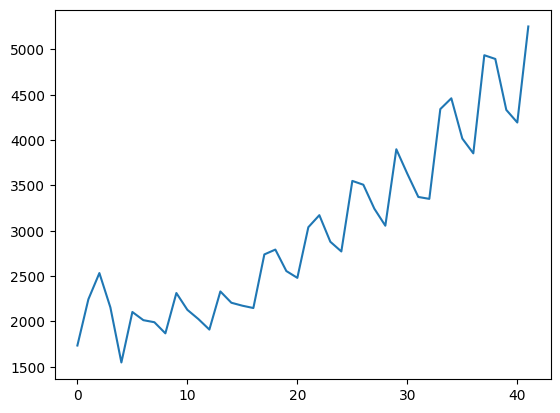

In [7]:
import matplotlib.pyplot as plt
cc.Sales.plot()

In [6]:
#Clean way to convert quarterly periods to datetime in pandas
cc['Quarter_Year'] = cc['Quarter'].str.split('_').apply(lambda x: ' 19'.join(x[:]))

cc

,Quarter,Sales,Quarter_Year
0,Q1_86,1734.827000,Q1 1986
1,Q2_86,2244.960999,Q2 1986
2,Q3_86,2533.804993,Q3 1986
3,Q4_86,2154.962997,Q4 1986
4,Q1_87,1547.818996,Q1 1987
5,Q2_87,2104.411995,Q2 1987
6,Q3_87,2014.362999,Q3 1987
7,Q4_87,1991.746998,Q4 1987
8,Q1_88,1869.049999,Q1 1988
9,Q2_88,2313.631996,Q2 1988


In [9]:
# converting into datetime formate as the index was not in correct formate.
cc['Date'] = (
    pd.to_datetime(
        cc['Quarter_Year'].str.split(' ').apply(lambda x: ''.join(x[::-1]))
,dayfirst=True))

cc['Quarters'] = 0

for i in range(42):                                   # seperating the Quarter
    n = cc['Quarter'][i]
    cc['Quarters'][i] = n[0:2]

dummy = pd.DataFrame(pd.get_dummies(cc['Quarters']))  # Creating dummy
cc = pd.concat((cc, dummy), axis=1)
cc.drop(['Quarter','Quarter_Year'] , axis =1, inplace = True)
cc

<ipython-input-9-17d2b303174b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc['Quarters'][i] = n[0:2]


,Sales,Date,Quarters,Q1,Q2,Q3,Q4
0,1734.827000,1986-01-01,Q1,1,0,0,0
1,2244.960999,1986-04-01,Q2,0,1,0,0
2,2533.804993,1986-07-01,Q3,0,0,1,0
3,2154.962997,1986-10-01,Q4,0,0,0,1
4,1547.818996,1987-01-01,Q1,1,0,0,0
5,2104.411995,1987-04-01,Q2,0,1,0,0
6,2014.362999,1987-07-01,Q3,0,0,1,0
7,1991.746998,1987-10-01,Q4,0,0,0,1
8,1869.049999,1988-01-01,Q1,1,0,0,0
9,2313.631996,1988-04-01,Q2,0,1,0,0


In [10]:
cc["Date"] = pd.to_datetime(cc.Date,format="%b-%y")
cc["month"] = cc.Date.dt.strftime("%b") # month extraction
cc["year"] = cc.Date.dt.strftime("%Y") # year extraction
cc

,Sales,Date,Quarters,Q1,Q2,Q3,Q4,month,year
0,1734.827000,1986-01-01,Q1,1,0,0,0,Jan,1986
1,2244.960999,1986-04-01,Q2,0,1,0,0,Apr,1986
2,2533.804993,1986-07-01,Q3,0,0,1,0,Jul,1986
3,2154.962997,1986-10-01,Q4,0,0,0,1,Oct,1986
4,1547.818996,1987-01-01,Q1,1,0,0,0,Jan,1987
5,2104.411995,1987-04-01,Q2,0,1,0,0,Apr,1987
6,2014.362999,1987-07-01,Q3,0,0,1,0,Jul,1987
7,1991.746998,1987-10-01,Q4,0,0,0,1,Oct,1987
8,1869.049999,1988-01-01,Q1,1,0,0,0,Jan,1988
9,2313.631996,1988-04-01,Q2,0,1,0,0,Apr,1988


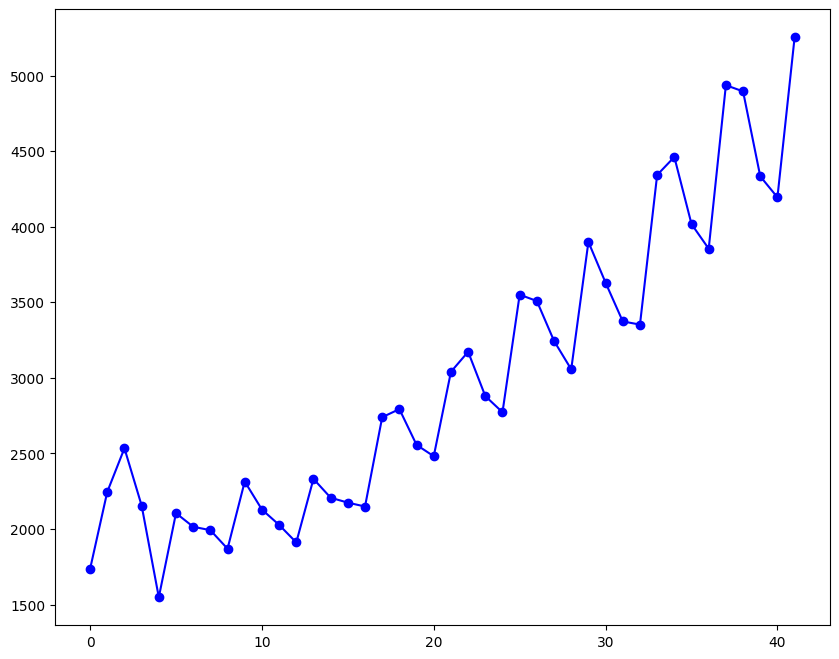

In [11]:
cc['Sales'].plot(figsize=(10, 8),color='blue',marker='o')
plt.show()

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

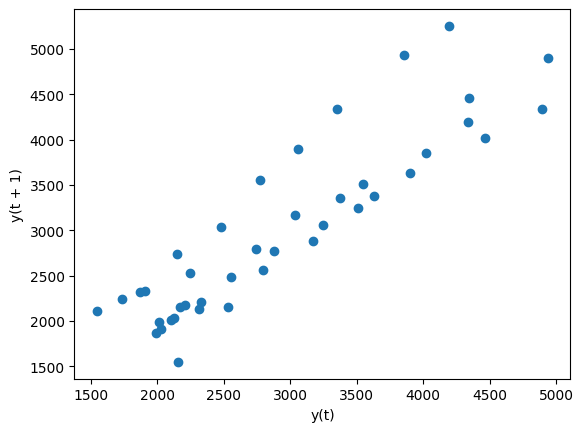

In [18]:
# scatter plot
from pandas.plotting import lag_plot
lag_plot(cc.Sales)

<Axes: ylabel='Density'>

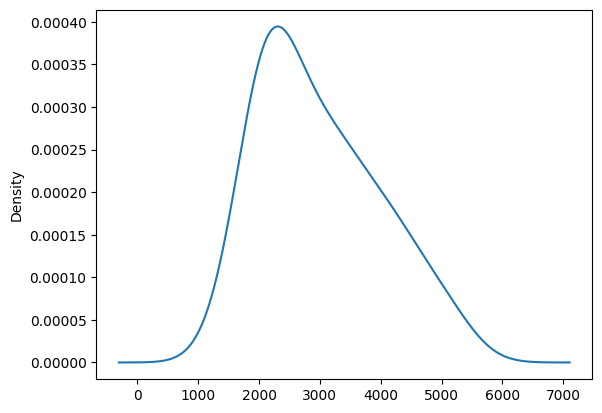

In [14]:

cc.Sales.plot(kind='kde')
#Density plot and Lag plot

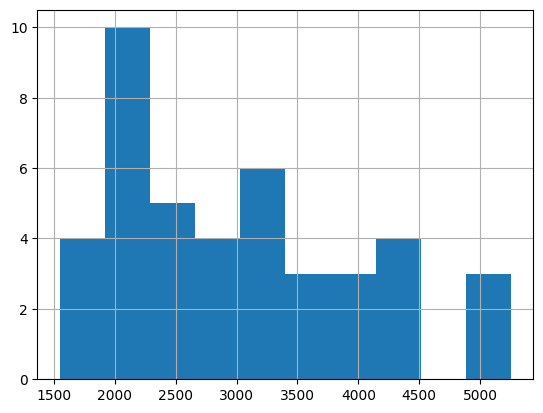

In [13]:
#Histogram
cc.Sales.hist()
plt.show()

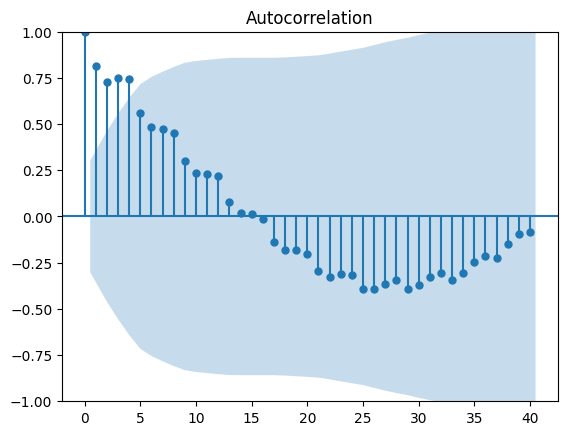

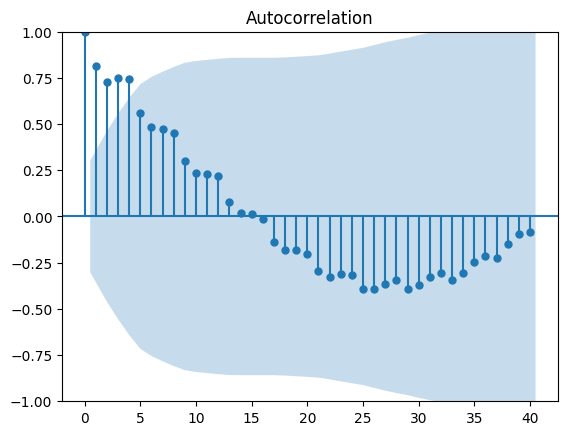

In [20]:
# create an autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(cc.Sales,lags=40)

<ipython-input-23-3612a540e943>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Quarters", y="Sales" , palette="Paired",data = cc)
<ipython-input-23-3612a540e943>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="year", y="Sales" , palette="Paired",data = cc)


<Axes: xlabel='year', ylabel='Sales'>

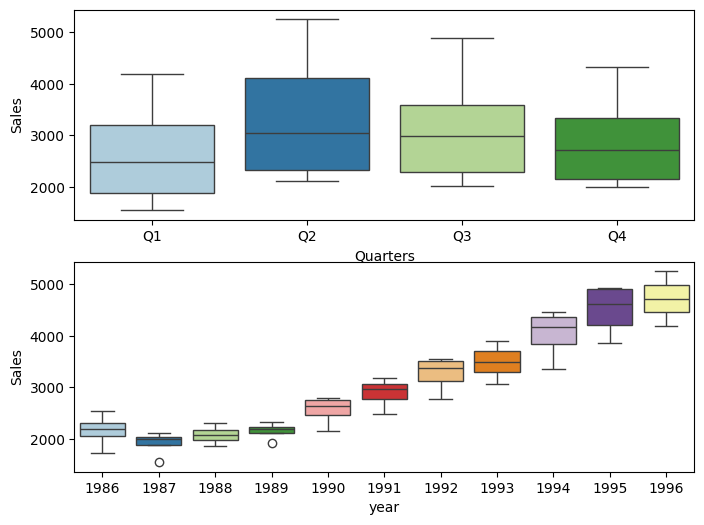

In [23]:
# Box plot for every

import seaborn as sns
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="Quarters", y="Sales" , palette="Paired",data = cc)

plt.subplot(212)
sns.boxplot(x="year", y="Sales" , palette="Paired",data = cc)

In [24]:
#Splitting data
cc.set_index('Date',inplace=True)
cc.index.year

Int64Index([1986, 1986, 1986, 1986, 1987, 1987, 1987, 1987, 1988, 1988, 1988,
            1988, 1989, 1989, 1989, 1989, 1990, 1990, 1990, 1990, 1991, 1991,
            1991, 1991, 1992, 1992, 1992, 1992, 1993, 1993, 1993, 1993, 1994,
            1994, 1994, 1994, 1995, 1995, 1995, 1995, 1996, 1996],
           dtype='int64', name='Date')

In [25]:
upsampled_month = cc.drop(['Quarters','Q1','Q2','Q3','Q4'], axis=1)
upsampled_month = upsampled_month.resample('M').mean()
print(upsampled_month.head(13))

                  Sales
Date                   
1986-01-31  1734.827000
1986-02-28          NaN
1986-03-31          NaN
1986-04-30  2244.960999
1986-05-31          NaN
1986-06-30          NaN
1986-07-31  2533.804993
1986-08-31          NaN
1986-09-30          NaN
1986-10-31  2154.962997
1986-11-30          NaN
1986-12-31          NaN
1987-01-31  1547.818996


<ipython-input-25-534b09ad38c2>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  upsampled_month = upsampled_month.resample('M').mean()


                  Sales
Date                   
1986-01-31  1734.827000
1986-02-28  1904.871666
1986-03-31  2074.916332
1986-04-30  2244.960999
1986-05-31  2341.242330
1986-06-30  2437.523661
1986-07-31  2533.804993
1986-08-31  2407.524328
1986-09-30  2281.243663
1986-10-31  2154.962997
1986-11-30  1952.581664
1986-12-31  1750.200330
1987-01-31  1547.818996
1987-02-28  1733.349996
1987-03-31  1918.880995


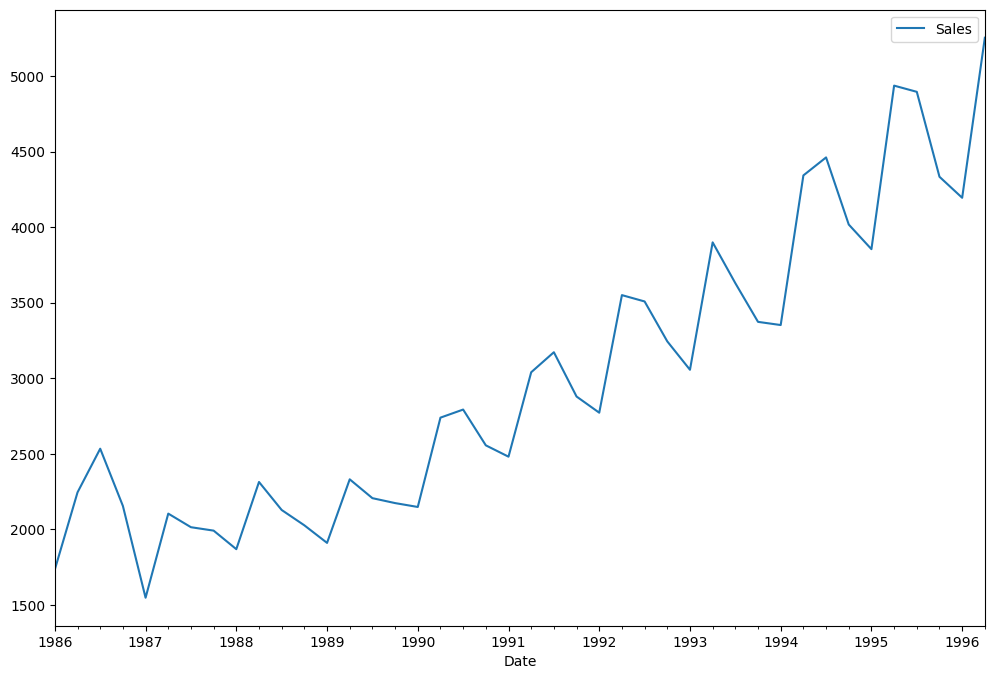

In [26]:
interpolated_month = upsampled_month.interpolate(method='linear') ## interplation was done for nan values which we get after doing upsampling by month
print(interpolated_month.head(15))
interpolated_month.plot(figsize=(12,8))
plt.show()

In [29]:
train_data = interpolated_month[:100]
test_data = interpolated_month[100:]

In [30]:
import numpy as np

interpolated_month.reset_index(inplace=True)
interpolated_month['t'] = np.arange(1,len(interpolated_month)+1)
interpolated_month['t_squared'] = np.square(interpolated_month.t)
interpolated_month["month"] = interpolated_month.Date.dt.strftime("%b") # month extraction
interpolated_month["year"] = interpolated_month.Date.dt.strftime("%Y") # year extraction
months = pd.get_dummies(interpolated_month['month'])
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
cocacola = pd.concat([interpolated_month,months],axis=1)
cocacola['log_sales'] = np.log(cocacola['Sales'])
cocacola

,index,Date,Sales,t,t_squared,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_sales
0,0,1986-01-31,1734.827000,1,1,Jan,1986,1,0,0,0,0,0,0,0,0,0,0,0,7.458663
1,1,1986-02-28,1904.871666,2,4,Feb,1986,0,1,0,0,0,0,0,0,0,0,0,0,7.552170
2,2,1986-03-31,2074.916332,3,9,Mar,1986,0,0,1,0,0,0,0,0,0,0,0,0,7.637676
3,3,1986-04-30,2244.960999,4,16,Apr,1986,0,0,0,1,0,0,0,0,0,0,0,0,7.716443
4,4,1986-05-31,2341.242330,5,25,May,1986,0,0,0,0,1,0,0,0,0,0,0,0,7.758437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,119,1995-12-31,4240.333333,120,14400,Dec,1995,0,0,0,0,0,0,0,0,0,0,0,1,8.352397
120,120,1996-01-31,4194.000000,121,14641,Jan,1996,1,0,0,0,0,0,0,0,0,0,0,0,8.341410
121,121,1996-02-29,4547.000000,122,14884,Feb,1996,0,1,0,0,0,0,0,0,0,0,0,0,8.422223
122,122,1996-03-31,4900.000000,123,15129,Mar,1996,0,0,1,0,0,0,0,0,0,0,0,0,8.496990


In [31]:
size = 100

train_data = cocacola.iloc[:size]
test_data = cocacola.iloc[size:]

In [32]:
# Linear model
import statsmodels.formula.api as smf

linear_model = smf.ols('Sales~t',data=train_data).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test_data['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(pred_linear))**2))
rmse_linear

686.8740863668942

In [33]:
#Exponential

Exp = smf.ols('log_sales~t',data=train_data).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test_data['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

530.326802509923

In [35]:
#Quadratic

Quad = smf.ols('Sales~t+t_squared',data=train_data).fit()
pred_Quad = pd.Series(Quad.predict(test_data[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

371.29418344986675

In [36]:
#Additive seasonality


add_sea = smf.ols('Sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train_data).fit()
pred_add_sea = pd.Series(add_sea.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1837.7879723483793

In [37]:
#Additive Seasonality Quadratic

add_sea_Quad = smf.ols('Sales~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train_data).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

225.8049881036695

In [38]:
#Multiplicative Seasonality

Mul_sea = smf.ols('log_sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train_data).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test_data))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1904.7944171920315

In [39]:
#Multiplicative Additive Seasonality


Mul_Add_sea = smf.ols('log_sales~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train_data).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test_data))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

396.41978173823406

In [40]:
#Compare the results

data = {"Models":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'], inplace=True, ignore_index=True)

<ipython-input-41-650c47fb3174>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RMSE_Values', y='Models', data=table_rmse,palette = ['#f94144', '#f3722c', '#f8961e', '#f9c74f', '#90be6d', '#43aa8b', '#577590'], ax = axe)


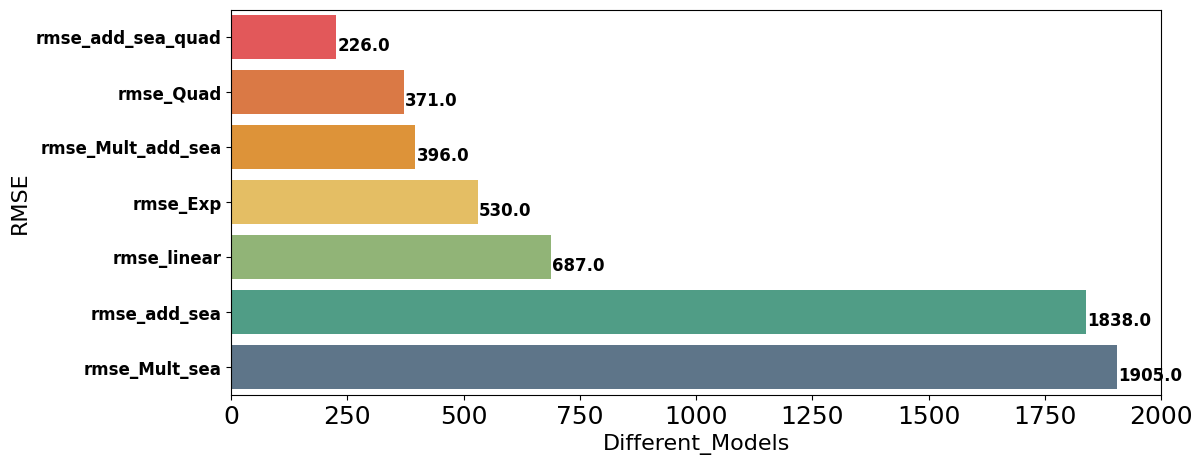

In [41]:
f, axe = plt.subplots(1,1, figsize=(12,5), dpi=100)
sns.barplot(x='RMSE_Values', y='Models', data=table_rmse,palette = ['#f94144', '#f3722c', '#f8961e', '#f9c74f', '#90be6d', '#43aa8b', '#577590'], ax = axe)
axe.set_xlabel('Different_Models', size=16)
axe.set_ylabel('RMSE', size=16)
plt.yticks(fontsize=12,fontweight = 'bold')
plt.xticks(fontsize=18)

for i, v in enumerate(np.round(table_rmse.RMSE_Values.values,0)):
    axe.text(v + 3, i + .25, str(v),
            color = 'black', fontweight = 'bold', fontsize= 12)

plt.show()